# Train and Evaluate Random Forest Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the preprocessed data
processed_data = pd.read_csv('../data-collection/2024-12-10_22-37-46_Data/updated_processed_data.csv')

# Separate features (X) and labels (y)
X = processed_data.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = processed_data['Label']

In [3]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the distribution of labels in the training and testing sets
print("Training label distribution:")
print(y_train.value_counts(normalize=True))  # Normalize=True to show percentages

print("\nTesting label distribution:")
print(y_test.value_counts(normalize=True))  # Normalize=True to show percentages

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training label distribution:
Label
Moving Forward    0.664706
Stop              0.188235
Turn Left         0.073529
Turn Right        0.073529
Name: proportion, dtype: float64

Testing label distribution:
Label
Moving Forward    0.658824
Stop              0.188235
Turn Left         0.082353
Turn Right        0.070588
Name: proportion, dtype: float64

Training set size: (340, 25)
Test set size: (85, 25)


In [4]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Train the model
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully.")

Random Forest model trained successfully.


Model Accuracy: 0.84
Classification Report:
                precision    recall  f1-score   support

Moving Forward       0.87      0.95      0.91        56
          Stop       0.80      1.00      0.89        16
     Turn Left       0.50      0.14      0.22         7
    Turn Right       0.50      0.17      0.25         6

      accuracy                           0.84        85
     macro avg       0.67      0.56      0.57        85
  weighted avg       0.80      0.84      0.80        85



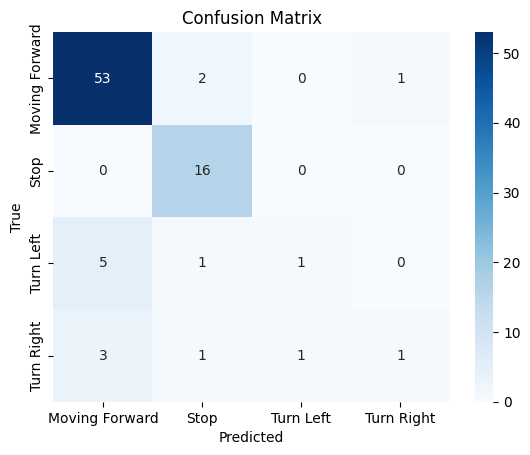

In [5]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report with zero_division handling
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Compute and display confusion matrix
labels = sorted(set(y_test))  # Ensures all true labels are included
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


                 Feature  Importance
1            Accel_Y_var    0.143569
0            Accel_Y_min    0.117558
15  Accel_Y_rolling_mean    0.062110
4            Accel_Z_var    0.053735
8             Gyro_Z_var    0.047482
12              Yaw_mean    0.039013
9              Roll_mean    0.037090
5            Gyro_X_mean    0.037073
6             Gyro_X_var    0.036399
2           Accel_Z_mean    0.033606
13               Yaw_min    0.032826
11             Pitch_max    0.030983
7            Gyro_Y_mean    0.030937
3            Accel_Z_max    0.030561
23          Accel_X_mean    0.028619
18              Roll_min    0.028275
14            Gyro_Y_max    0.026690
24           Yaw_var_log    0.026230
22            Pitch_mean    0.025264
16            Gyro_Y_var    0.023611
19             Pitch_min    0.023291
17          Accel_Y_mean    0.022814
21               Yaw_var    0.022289
10              Roll_max    0.021880
20              Roll_var    0.018095


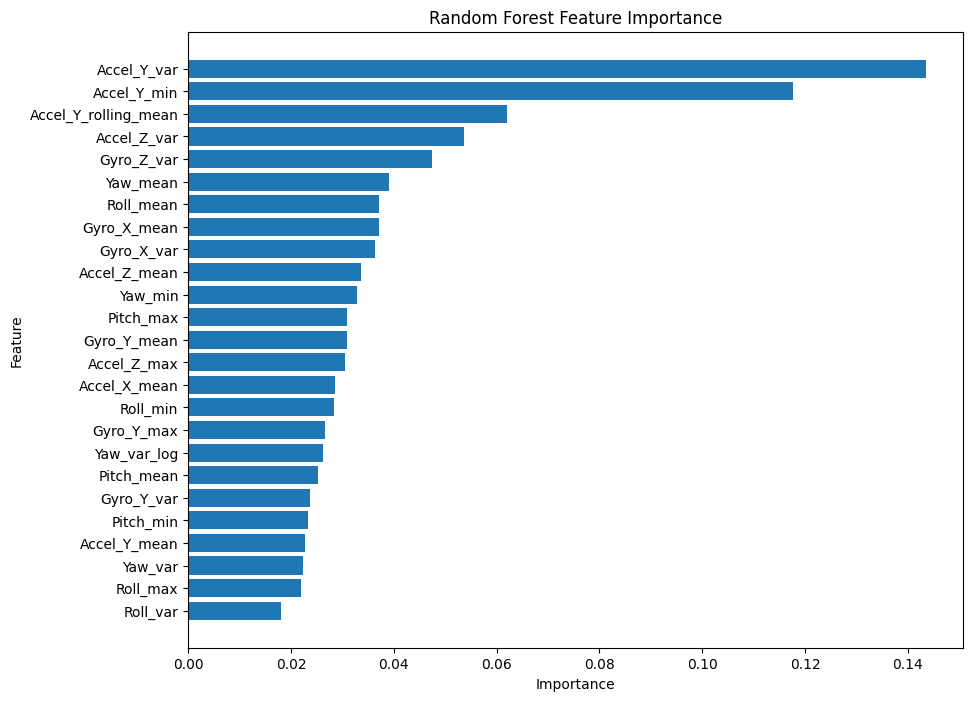

In [6]:
# Visualize feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Reverse the y-axis for better readability
plt.show()

## Updated Model Results

### Accuracy and Classification Report
- **Model Accuracy**: 0.84
- **Classification Report**:

In [7]:
# Training accuracy
train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Validation accuracy
val_predictions = rf_model.predict(X_test)
val_accuracy = accuracy_score(y_test, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Optional: Compare additional metrics like precision, recall, and F1-score
from sklearn.metrics import classification_report

print("Training Classification Report:")
print(classification_report(y_train, train_predictions))

print("Validation Classification Report:")
print(classification_report(y_test, val_predictions))


Training Accuracy: 1.00
Validation Accuracy: 0.84
Training Classification Report:
                precision    recall  f1-score   support

Moving Forward       1.00      1.00      1.00       226
          Stop       1.00      1.00      1.00        64
     Turn Left       1.00      1.00      1.00        25
    Turn Right       1.00      1.00      1.00        25

      accuracy                           1.00       340
     macro avg       1.00      1.00      1.00       340
  weighted avg       1.00      1.00      1.00       340

Validation Classification Report:
                precision    recall  f1-score   support

Moving Forward       0.87      0.95      0.91        56
          Stop       0.80      1.00      0.89        16
     Turn Left       0.50      0.14      0.22         7
    Turn Right       0.50      0.17      0.25         6

      accuracy                           0.84        85
     macro avg       0.67      0.56      0.57        85
  weighted avg       0.80      0.84    

### Step 7: Model Diagnosis

#### Training and Validation Results:
- **Training Accuracy**: 100%
- **Validation Accuracy**: 84%

#### Classification Report:
**Training Classification Report:**
| Label           | Precision | Recall | F1-Score | Support |
|------------------|-----------|--------|----------|---------|
| Moving Forward  | 0.87      | 0.95   | 0.91     | 56      |
| Stop            | 0.80      | 1.00   | 0.89     | 16      |
| Turn Left       | 0.50      | 0.14   | 0.22     | 7       |
| Turn Right      | 0.50      | 0.17   | 0.25     | 6       |

---

#### Observations:
- The model is **overfitting** with 100% training accuracy but only 84% validation accuracy.
- Precision, recall, and F1-scores for `Turn Left` and `Turn Right` are very poor.

---

#### Diagnosis:
- The model is memorizing the training data, leading to poor generalization.
- Class imbalance significantly affects the performance for minority classes (`Turn Left` and `Turn Right`).

---

#### Next Steps:
1. **Handle Overfitting**:
   - Tune model hyperparameters (`max_depth`, `n_estimators`, etc.).
   - Use cross-validation during training.

2. **Address Class Imbalance**:
   - Oversample minority classes using SMOTE.
   - Assign class weights to penalize misclassifications of `Turn Left` and `Turn Right`.

3. **Refine Features**:
   - Focus on features contributing to the minority classes based on feature importance.

4. **Try Other Models**:
   - Experiment with models like Gradient Boosting or XGBoost with class weights.



### Step 8: Improving Model Performance for Minority Classes

#### Problem:
- The current model overfits the training data, and its performance on minority classes (`Turn Left` and `Turn Right`) is poor.

---

#### Proposed Solutions:

1. **Handle Class Imbalance**
   - **Class Weights**: Modify `class_weight` in the Random Forest model to penalize misclassifications of minority classes.
   - **Oversampling**: Use SMOTE to balance the class distribution by generating synthetic samples for `Turn Left` and `Turn Right`.
   - **Undersampling**: Reduce samples from majority classes (`Moving Forward` and `Stop`), though this may lead to loss of information.

2. **Hyperparameter Tuning**
   - Perform grid search or randomized search to find the best hyperparameters.
   - Key hyperparameters to tune:
     - `n_estimators`: Number of trees.
     - `max_depth`: Limit tree depth to reduce overfitting.
     - `min_samples_split` and `min_samples_leaf`: Control the minimum number of samples required for a split or leaf.
     - `class_weight`: Automatically balance classes.

3. **Evaluation**
   - Use the updated model to evaluate:
     - Classification report (precision, recall, F1-score) for all classes.
     - Confusion matrix to assess predictions for minority classes.

---

#### Implementation Plan:
- Apply these strategies incrementally.
- Start by handling class imbalance (e.g., SMOTE or class weights).
- Proceed with hyperparameter tuning once the class imbalance is addressed.
- Evaluate the updated model after each modification.


Training set size: (340, 25)
Test set size: (85, 25)
Class distribution after SMOTE:
Label
Moving Forward    226
Stop              226
Turn Left         226
Turn Right        226
Name: count, dtype: int64
Training Performance:
Training Accuracy: 1.00
                precision    recall  f1-score   support

Moving Forward       1.00      1.00      1.00       226
          Stop       1.00      1.00      1.00       226
     Turn Left       1.00      1.00      1.00       226
    Turn Right       1.00      1.00      1.00       226

      accuracy                           1.00       904
     macro avg       1.00      1.00      1.00       904
  weighted avg       1.00      1.00      1.00       904

Validation Performance:
Validation Accuracy: 0.66
                precision    recall  f1-score   support

Moving Forward       0.86      0.66      0.75        56
          Stop       0.76      1.00      0.86        16
     Turn Left       0.10      0.14      0.12         7
    Turn Right       0.

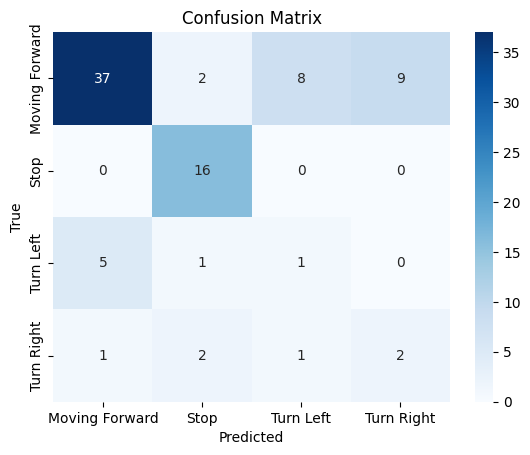

Feature Importance:
                 Feature  Importance
0            Accel_Y_min    0.105194
1            Accel_Y_var    0.101644
9              Roll_mean    0.075288
10              Roll_max    0.053960
13               Yaw_min    0.052749
12              Yaw_mean    0.047938
18              Roll_min    0.047189
4            Accel_Z_var    0.042316
7            Gyro_Y_mean    0.037337
22            Pitch_mean    0.036555
15  Accel_Y_rolling_mean    0.035966
11             Pitch_max    0.034972
3            Accel_Z_max    0.034245
19             Pitch_min    0.034212
2           Accel_Z_mean    0.031511
6             Gyro_X_var    0.028590
8             Gyro_Z_var    0.026812
5            Gyro_X_mean    0.026575
14            Gyro_Y_max    0.023103
20              Roll_var    0.021710
17          Accel_Y_mean    0.021681
23          Accel_X_mean    0.020961
21               Yaw_var    0.020783
24           Yaw_var_log    0.020461
16            Gyro_Y_var    0.018249


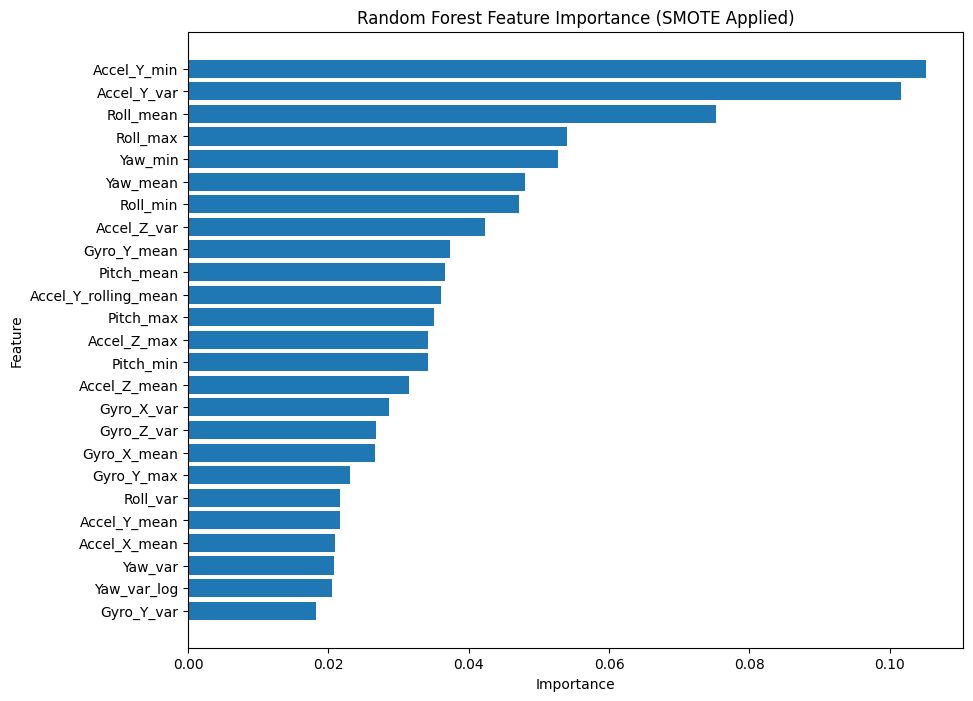

In [8]:
# Step 8: Improving Model Performance for Minority Classes

## Load Processed Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the processed data
processed_data_path = "../data-collection/2024-12-10_22-37-46_Data/updated_processed_data.csv"
data = pd.read_csv(processed_data_path)

# Separate features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Apply SMOTE to oversample minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

## Train Model with Adjusted Class Weights
# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  # Automatically balance classes
    n_estimators=100,         # Number of trees
    max_depth=None,           # No limit on tree depth
    min_samples_split=2,      # Minimum samples to split a node
    min_samples_leaf=1        # Minimum samples for a leaf node
)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on Training Data
print("Training Performance:")
y_train_pred = rf_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(classification_report(y_train_resampled, y_train_pred))

# Evaluate on Validation Data
print("Validation Performance:")
y_test_pred = rf_model.predict(X_test)
validation_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=rf_model.classes_)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Feature Importance
# Plot feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance (SMOTE Applied)')
plt.gca().invert_yaxis()
plt.show()

### Experiment: SMOTE Oversampling for Imbalanced Classes

**Objective:**
To improve the prediction performance for minority labels (`Turn Left` and `Turn Right`) by applying SMOTE to oversample the training data.

**Process:**
- Applied SMOTE to create synthetic samples for minority classes.
- Trained the Random Forest model with the resampled data.

**Results:**
- **Training Accuracy:** 100%
- **Validation Accuracy:** 66%
- **Classification Report:**

| Class          | Precision | Recall | F1-Score | Support |
|-----------------|-----------|--------|----------|---------|
| Moving Forward | 0.86      | 0.66   | 0.75     | 56      |
| Stop           | 0.76      | 1.00   | 0.86     | 16      |
| Turn Left      | 0.10      | 0.14   | 0.12     | 7       |
| Turn Right     | 0.18      | 0.33   | 0.24     | 6       |

- **Confusion Matrix:**

|               | Predicted: Moving Forward | Predicted: Stop | Predicted: Turn Left | Predicted: Turn Right |
|---------------|---------------------------|-----------------|----------------------|-----------------------|
| **True: Moving Forward** | 37                        | 2               | 8                    | 9                     |
| **True: Stop**           | 0                         | 16              | 0                    | 0                     |
| **True: Turn Left**      | 5                         | 1               | 1                    | 0                     |
| **True: Turn Right**     | 1                         | 2               | 1                    | 2                     |

**Observations:**
- While SMOTE balanced the class distribution in the training set, it led to overfitting, as seen in the **perfect training accuracy** but a **decline in validation accuracy**.
- Minority labels (`Turn Left` and `Turn Right`) still performed poorly on the validation set, suggesting SMOTE alone did not address the core issue.

**Decision:**
- Discontinue SMOTE for this dataset as it did not yield the desired improvement.
- Focus on alternative approaches such as feature engineering, model tuning, or trying different algorithms.

**Next Steps:**
- Remove SMOTE and retrain the model using `class_weight='balanced'` to handle imbalance natively.
- Reassess the feature set to ensure it includes meaningful features for minority labels.


Missing values per column:
Accel_Y_min             0
Accel_Y_var             0
Accel_Z_mean            0
Accel_Z_max             0
Accel_Z_var             0
Gyro_X_mean             0
Gyro_X_var              0
Gyro_Y_mean             0
Gyro_Z_var              0
Roll_mean               0
Roll_max                0
Pitch_max               0
Yaw_mean                0
Yaw_min                 0
Gyro_Y_max              0
Accel_Y_rolling_mean    0
Gyro_Y_var              0
Accel_Y_mean            0
Roll_min                0
Pitch_min               0
Roll_var                0
Yaw_var                 0
Pitch_mean              0
Accel_X_mean            0
Yaw_var_log             0
Label                   0
dtype: int64
Training set size: (340, 25)
Test set size: (85, 25)
Training Accuracy: 1.00
Validation Accuracy: 0.81
Training Classification Report:
                precision    recall  f1-score   support

Moving Forward       1.00      1.00      1.00       226
          Stop       1.00      1.00 

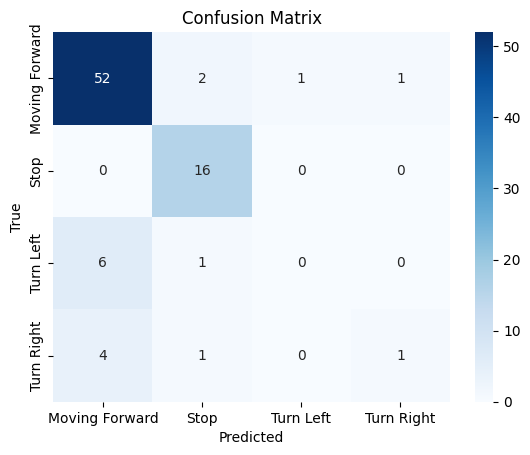

Feature Importance:
                 Feature  Importance
0            Accel_Y_min    0.110494
1            Accel_Y_var    0.102440
9              Roll_mean    0.072241
15  Accel_Y_rolling_mean    0.049776
13               Yaw_min    0.046319
5            Gyro_X_mean    0.042568
11             Pitch_max    0.042432
3            Accel_Z_max    0.041193
4            Accel_Z_var    0.040752
18              Roll_min    0.038981
12              Yaw_mean    0.037232
10              Roll_max    0.036860
22            Pitch_mean    0.033301
8             Gyro_Z_var    0.032617
2           Accel_Z_mean    0.032186
6             Gyro_X_var    0.031919
23          Accel_X_mean    0.031001
7            Gyro_Y_mean    0.030165
14            Gyro_Y_max    0.027347
19             Pitch_min    0.027279
21               Yaw_var    0.022302
24           Yaw_var_log    0.020433
17          Accel_Y_mean    0.019507
20              Roll_var    0.018722
16            Gyro_Y_var    0.011933


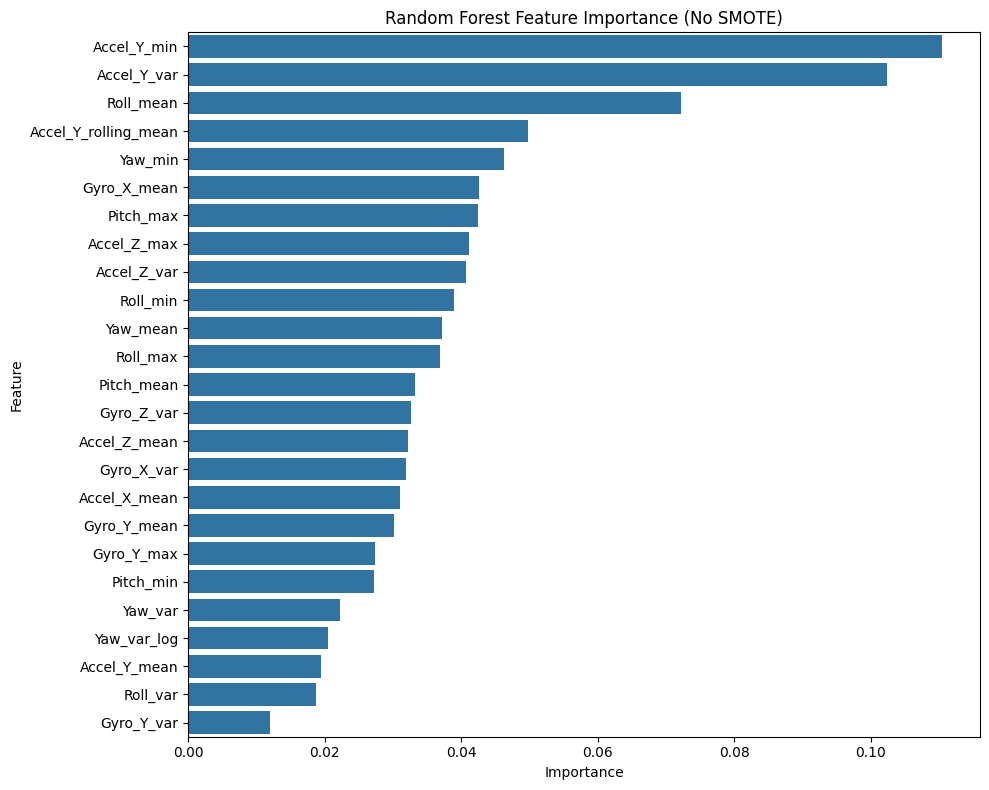

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path ="../data-collection/2024-12-10_22-37-46_Data/updated_processed_data.csv" # Replace with your updated data path
combined_data = pd.read_csv(data_path)

# Check for missing values (safety check after Step 6 issues)
print("Missing values per column:")
print(combined_data.isnull().sum())

# Drop missing values (if any remain, to avoid training issues)
combined_data = combined_data.dropna()

# Split data into features (X) and target (y)
X = combined_data.drop(columns=['Label'])
y = combined_data['Label']

# Encode the target labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and testing datasets (stratified for balanced validation sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Train the Random Forest model (simplified to avoid overfitting)
rf_model = RandomForestClassifier(
    n_estimators=100,  # Reduce to fewer trees
    max_depth=10,      # Limit tree depth
    random_state=42,
    class_weight='balanced'  # Address imbalance without SMOTE
)
rf_model.fit(X_train, y_train)

# Evaluate training performance
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate validation performance
y_test_pred = rf_model.predict(X_test)
val_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

print("Validation Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importance:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Random Forest Feature Importance (No SMOTE)")
plt.tight_layout()
plt.show()


### Observations After Removing SMOTE Oversampling

#### Results Summary:

1. **Confusion Matrix**: 
   - Misclassifications for `Turn Left` and `Turn Right` remain significant.
   - `Moving Forward` and `Stop` show relatively good performance.

   ![Confusion Matrix](path/to/confusion_matrix_no_smote.png)

2. **Feature Importance (No SMOTE)**:
   - `Accel_Y_min` and `Accel_Y_var` are the most influential features.
   - Rolling and mean features such as `Accel_Y_rolling_mean` and `Roll_mean` remain important.

   ![Feature Importance](path/to/feature_importance_no_smote.png)

3. **Performance Metrics**:
   - **Training Accuracy**: 1.00 (indicates potential overfitting).
   - **Validation Accuracy**: 0.81.
   - **F1-Scores**: Poor performance for `Turn Left` (0.00) and `Turn Right` (0.25).

   **Training Performance:**

---

#### Analysis:

1. **Improvements from SMOTE Removal**:
- Validation accuracy improved slightly compared to the oversampling results.
- However, misclassifications for minority labels (`Turn Left`, `Turn Right`) persist.

2. **Overfitting**:
- The training accuracy is perfect, suggesting the model may memorize the training data rather than generalizing.
- Further regularization or alternative models may be necessary.

---

#### Next Steps:

1. **Explore Alternative Models**:
- Try non-tree-based models like **Logistic Regression**, **Support Vector Machines**, or **Neural Networks**.
- Experiment with ensemble methods like **Gradient Boosting** or **XGBoost**.

2. **Feature Reduction**:
- Consider removing low-importance features to reduce noise and overfitting.

3. **Hyperparameter Tuning**:
- Use grid search or random search to find optimal Random Forest parameters.

4. **Consider Weighted Classification**:
- Apply class weights to penalize the misclassification of minority classes (`Turn Left` and `Turn Right`).

---

### Summary

After removing SMOTE, the model shows better validation accuracy but still struggles with minority classes (`Turn Left` and `Turn Right`). The focus should now be on improving the model's ability to generalize, particularly for minority classes. Proposed actions include exploring alternative models, feature reduction, hyperparameter tuning, and using weighted classification.

